In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')

In [208]:
education_df = pd.read_csv('../data/preprocessed-data/normalized csv/educations.csv')
education_df.head()

,University,Degree,Date,User,university_name,faculty_name
0,information technology institute (iti),nov 2021 - jun 2022,NaN,%D9%90%D9%90amiraelmergawy,iti,NaN
1,ain shams university,"bachelor's degree, computer science",2016 - 2020,%D9%90%D9%90amiraelmergawy,ain shams,computer
2,information technology institute (iti),"internship, web development using mearn stack",Dec 2021,-ezz,iti,NaN
3,al-azhar university,geophysics and seismology,Sep 2015 - Aug 2019,-ezz,azhar,science
4,"faculty of petroleum and mining engineering, s...","bachelor's degree, petroleum engineering",2015 - 2020,1212mohamedtaha,NaN,petroleum


In [209]:
experience_df = pd.read_csv('../data/preprocessed-data/normalized csv/experiences.csv')
experience_df = experience_df[(experience_df['title_tag'] != 'internship') & (experience_df['EmploymentType'] != 'Internship')]
experience_df = experience_df[(experience_df['title_tag'] != 'student') & (experience_df['title_tag'] != 'teaching')]
experience_df.head()

,User,CompanyUrl,Company,Title,EmploymentType,From,To,Duration,Location,title_tag
4,-ezz,https://www.linkedin.com/company/30101254/,sonono,software engineer,Full-time,2022-01-01,Present,16.0,"Basel, Switzerland",software
6,-ezz,UNKNOWN,CEL - Consulting Engineering Bureau,senior geotechnical engineer,Full-time,2019-09-01,Aug 2020,12.0,Egypt,NaN
7,1212mohamedtaha,https://www.linkedin.com/company/777868/,Etisalat Misr,big data engineer,Full-time,2022-05-01,Present,12.0,"New Cairo, Cairo, Egypt",data
9,1212mohamedtaha,https://www.linkedin.com/company/2229028/,"The Translation Gate, LLC",english / arabic translator,Freelance,2021-01-01,Mar 2021,3.0,Remote,NaN
10,3omarbadr,https://www.linkedin.com/company/18899346/,ACME SAICO - Integrated Engineering Systems -(...,software engineer,Full-time,2022-09-01,Present,8.0,"Heliopolis, Cairo, Egypt",software


In [210]:
# every user has one job
experience_df = experience_df.groupby('User').first().reset_index()
experience_df.head()

,User,CompanyUrl,Company,Title,EmploymentType,From,To,Duration,Location,title_tag
0,-ezz,https://www.linkedin.com/company/30101254/,sonono,software engineer,Full-time,2022-01-01,Present,16.0,"Basel, Switzerland",software
1,1212mohamedtaha,https://www.linkedin.com/company/777868/,Etisalat Misr,big data engineer,Full-time,2022-05-01,Present,12.0,"New Cairo, Cairo, Egypt",data
2,3omarbadr,https://www.linkedin.com/company/18899346/,ACME SAICO - Integrated Engineering Systems -(...,software engineer,Full-time,2022-09-01,Present,8.0,"Heliopolis, Cairo, Egypt",software
3,a-mohsen,https://www.linkedin.com/company/10590015/,ItsaCheckmate,software tech lead,Freelance,2022-08-01,Present,9.0,Egypt,Lead
4,a-nan-farag-b78a0b12b,https://www.linkedin.com/company/235489/,KnowledgeNet,senior java developer,Full-time,2021-05-01,Present,24.0,"Cairo, Egypt",software


In [211]:
# remove iti from education
education_df_without_iti = education_df[education_df['university_name'] != 'iti']

# get first education
education_df_without_iti = education_df_without_iti.groupby('User').first().reset_index()

# join education and experience
df = pd.merge(education_df_without_iti, experience_df, on='User', how='inner')
df.head()

,User,University,Degree,Date,university_name,faculty_name,CompanyUrl,Company,Title,EmploymentType,From,To,Duration,Location,title_tag
0,-ezz,al-azhar university,geophysics and seismology,Sep 2015 - Aug 2019,azhar,science,https://www.linkedin.com/company/30101254/,sonono,software engineer,Full-time,2022-01-01,Present,16.0,"Basel, Switzerland",software
1,1212mohamedtaha,"faculty of petroleum and mining engineering, s...","bachelor's degree, petroleum engineering",2015 - 2020,None,petroleum,https://www.linkedin.com/company/777868/,Etisalat Misr,big data engineer,Full-time,2022-05-01,Present,12.0,"New Cairo, Cairo, Egypt",data
2,3omarbadr,al-azhar university,"bachelor of engineering, computer engineering",2013 - 2018,azhar,computer,https://www.linkedin.com/company/18899346/,ACME SAICO - Integrated Engineering Systems -(...,software engineer,Full-time,2022-09-01,Present,8.0,"Heliopolis, Cairo, Egypt",software
3,a-mohsen,ain shams university,"bachelor of engineering (b.eng.), computers an...",2013 - 2018,ain shams,computer,https://www.linkedin.com/company/10590015/,ItsaCheckmate,software tech lead,Freelance,2022-08-01,Present,9.0,Egypt,Lead
4,a-nan-farag-b78a0b12b,"al-azhar university , faculty of engineering","very good with honors, computers and systems",2011 - 2016,azhar,computer,https://www.linkedin.com/company/235489/,KnowledgeNet,senior java developer,Full-time,2021-05-01,Present,24.0,"Cairo, Egypt",software


In [212]:
related_faculties = [
    'computer',
    'electronic',
    'biomedical',
    'mechatronic',
    'engineering',
]

df = df[~df['faculty_name'].isin(related_faculties)]
len(df)

74

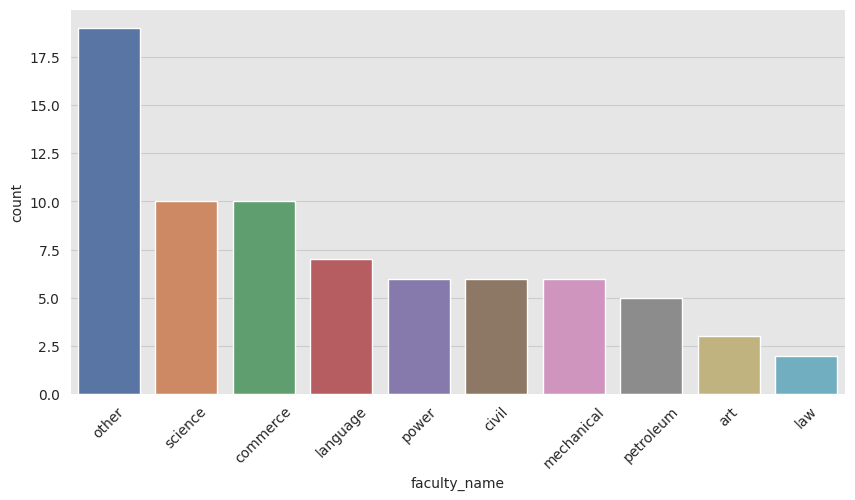

In [213]:
# fill Nan faculty_name
df['faculty_name'] = df['faculty_name'].fillna('other')

# plot faculty_name
plt.figure(figsize=(10, 5))
sns.countplot(x='faculty_name', data=df, order=df['faculty_name'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

In [214]:
df[df['faculty_name'] == 'other']['Degree'].value_counts()

2014 - 2018                                                           2
2016 - 2021                                                           2
2015 - 2019                                                           2
pre-master course, city/urban, community and regional planning        1
2016 - 2020                                                           1
high secondary diploma [ 94 % ].                                      1
bachelor's degree, physical therapy/therapist                         1
bachelor’s degree                                                     1
bachelor of education - bed                                           1
bachelor's degree, computing and automatic control                    1
ai product management specialization, ai product management           1
بكالوريوس تكنولوجيا, تكنولوجيا الحاسب الآلي/تقنية نظم الحاسب الآلي    1
very good, tourism and airline studies                                1
bachelor's degree, aerospace                                    

In [215]:
df['faculty_name'].value_counts()

other         19
science       10
commerce      10
language       7
power          6
civil          6
mechanical     6
petroleum      5
art            3
law            2
Name: faculty_name, dtype: int64

In [216]:
# get number of these who studied in iti
len(education_df[(education_df['User'].isin(df['User'])) & (education_df['university_name'] == 'iti')])

18

In [217]:
df['title_tag'].value_counts()

software      20
front-end     14
IT             8
full-stack     5
AI             5
data           4
Lead           4
back-end       4
devops         3
QA             3
mobile         2
Embedded       1
Name: title_tag, dtype: int64